# Import Required Libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor, StackingRegressor
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectFromModel
from xgboost import XGBRegressor
from scipy.stats import shapiro

# Load Data

In [2]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Get Data Information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [5]:
df.describe(include='O').T

,count,unique,top,freq
sex,1338,2,male,676
smoker,1338,2,no,1064
region,1338,4,southeast,364


# Check null Values

In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There is no null values in our dataset that means our dataset is clean

# Data Analysis

# Check the data distribution using Shapiro Test

In [7]:
def col_dist(frame):
    for i in frame.columns:
        if(frame[i].dtype == 'int64'):
            d, p = shapiro(frame[i])
            if(p>0.05):
                print(i, 'is normally distributed')
            else:
                print(i, 'is not normally distributed')
                
        if(frame[i].dtype == 'float64'):
            d, p = shapiro(frame[i])
            if(p>0.05):
                print(i, 'is normally distributed')
            else:
                print(i, 'is not normally distributed')

In [8]:
col_dist(df)

age is not normally distributed
bmi is not normally distributed
children is not normally distributed
charges is not normally distributed


# Univariant Analysis

C:\Users\sahil mathur\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


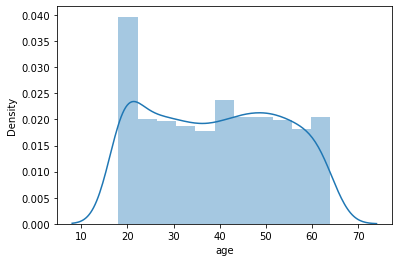

C:\Users\sahil mathur\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


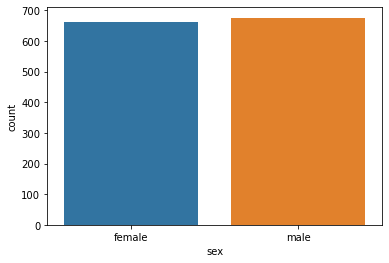

C:\Users\sahil mathur\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


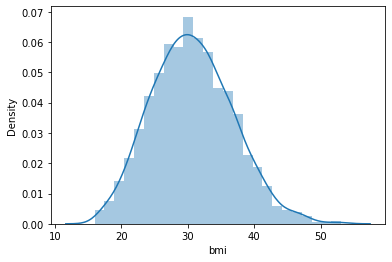

C:\Users\sahil mathur\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


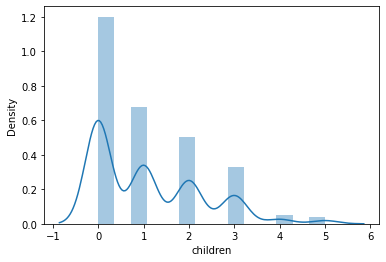

C:\Users\sahil mathur\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


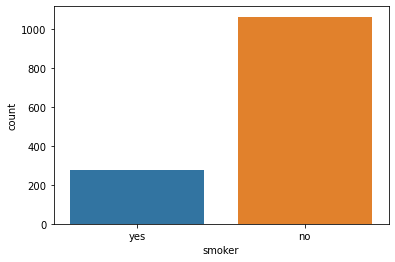

C:\Users\sahil mathur\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


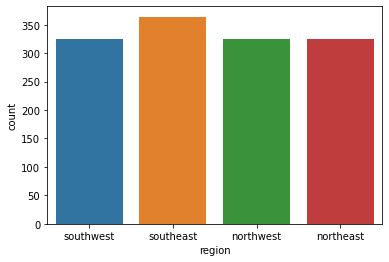

C:\Users\sahil mathur\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


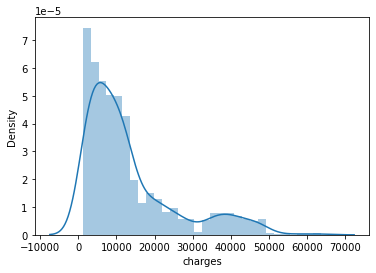

In [9]:
def univariant(frame):
    for i in frame.columns:
        if(frame[i].dtype == 'int64'):
            sns.distplot(frame[i])
            plt.show()
                
        elif(frame[i].dtype == 'float64'):
            sns.distplot(frame[i])
            plt.show()
            
        elif(frame[i].dtype == 'O'):
            sns.countplot(frame[i])
            plt.show()
            
univariant(df)

# Bivariant Analysis

C:\Users\sahil mathur\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


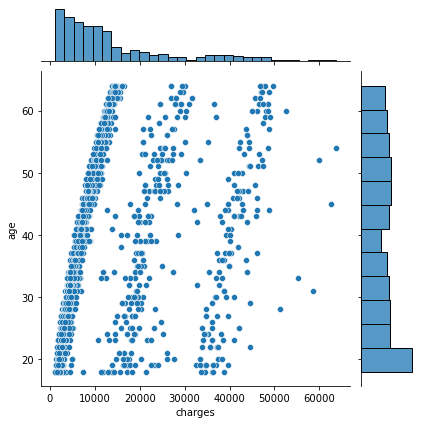

C:\Users\sahil mathur\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


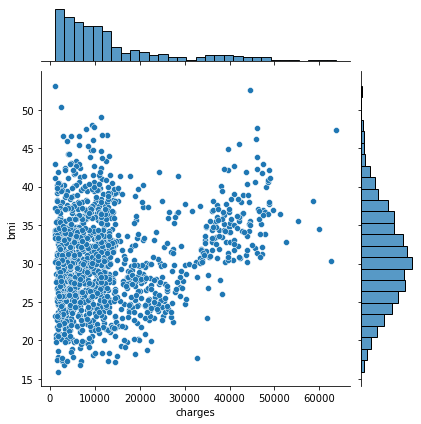

C:\Users\sahil mathur\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


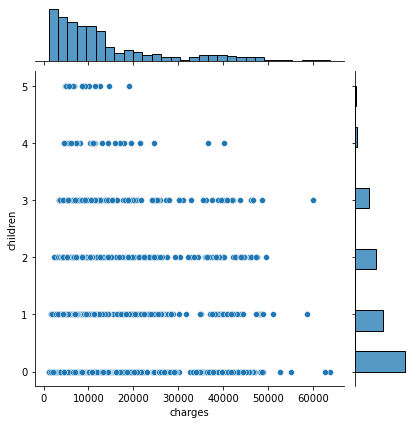

C:\Users\sahil mathur\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


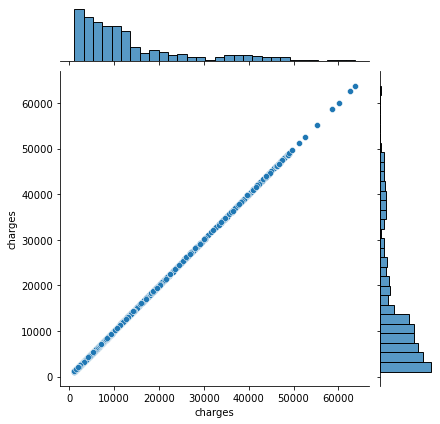

In [10]:
def bivariant(frame):
    for i in frame.columns:
        if(frame[i].dtype == 'int64'):
            sns.jointplot(df['charges'], frame[i])
            plt.show()
            
        elif(frame[i].dtype == 'float64'):
            sns.jointplot(df['charges'], frame[i])
            plt.show()
            
bivariant(df)

# Detecting Outliers

C:\Users\sahil mathur\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


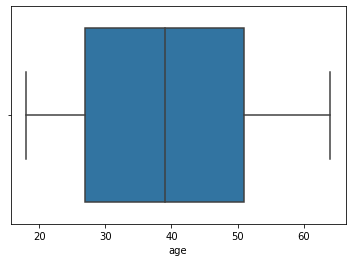

C:\Users\sahil mathur\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


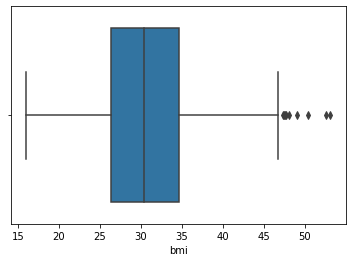

C:\Users\sahil mathur\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


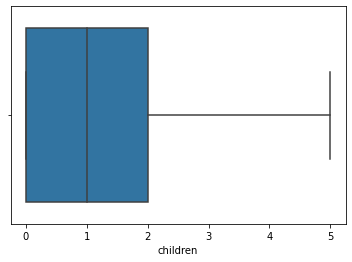

C:\Users\sahil mathur\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


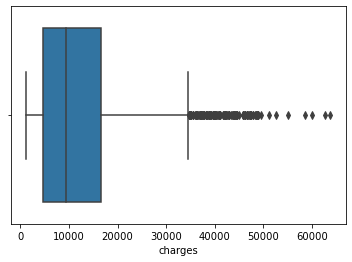

In [11]:
def det_outlier(frame):
    for i in frame.columns:
        if(frame[i].dtype == 'int64'):
            sns.boxplot(frame[i])
            plt.show()
            
        elif(frame[i].dtype == 'float64'):
            sns.boxplot(frame[i])
            plt.show()
            
det_outlier(df)

# Encode Categorical Variables

In [35]:
def encode(dataframe):
    lec = LabelEncoder()
    for j in dataframe.columns:
        if(dataframe[j].dtype == 'object'):
            dataframe[j] = lec.fit_transform(dataframe[j])
            
encode(new_df)

# Split Data Into Train and Test

In [36]:
x = df.drop('charges', axis=1)
y = df['charges']

In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

# Convert charges into log

In [41]:
y = np.log(y)

# Lets Build Models

# 1. Linear Regression

In [15]:
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [16]:
lr_pred = lr.predict(X_test)
mean_squared_error(Y_test, lr_pred, squared=False)

6065.824209744047

# 2. Random Forest Regressor

In [17]:
rf = RandomForestRegressor()
rf.fit(X_train, Y_train)

RandomForestRegressor()

In [18]:
rf_pred = rf.predict(X_test)
mean_squared_error(Y_test, rf_pred, squared=False)

4841.877209454337

# 3. Ada Boost Regressor

In [19]:
ada = AdaBoostRegressor()
ada.fit(X_train, Y_train)

AdaBoostRegressor()

In [20]:
ada_pred = ada.predict(X_test)
mean_squared_error(Y_test, ada_pred, squared=False)

5316.603828014387

# 4. XGBoost Regressor

In [21]:
xgb = XGBRegressor()
xgb.fit(X_train, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [22]:
xgb_pred = xgb.predict(X_test)
mean_squared_error(Y_test, xgb_pred, squared=False)

5246.814818235526

# 5. Gradient Boosting Regressor

In [23]:
gb = GradientBoostingRegressor()
gb.fit(X_train, Y_train)

GradientBoostingRegressor()

In [24]:
gb_pred = gb.predict(X_test)
mean_squared_error(Y_test, gb_pred, squared=False)

4383.097620947772

# After Hyper Parameter Tuning

In [30]:
hgb = GradientBoostingRegressor(learning_rate=0.03, max_depth=2, max_features='auto',
                          n_estimators=300)
hgb.fit(X_train, Y_train)

GradientBoostingRegressor(learning_rate=0.03, max_depth=2, max_features='auto',
                          n_estimators=300)

In [31]:
hgb_pred = hgb.predict(X_test)
mean_squared_error(Y_test, hgb_pred, squared=False)

4447.581374165646

After hyper parameter tuning my rmse increased so i will not consider hyperparamer tuning

# After Feature Selection

In [38]:
fgb = GradientBoostingRegressor()
fgb.fit(X_train, Y_train)

GradientBoostingRegressor()

In [39]:
fgb_pred = fgb.predict(X_test)
mean_squared_error(Y_test, fgb_pred, squared=False)

4385.809652161838

# After log transformation

In [44]:
lgb = GradientBoostingRegressor()
lgb.fit(X_train, Y_train)

GradientBoostingRegressor()

In [45]:
lgb_pred = lgb.predict(X_test)
mean_squared_error(Y_test, lgb_pred, squared=False)

0.332842185241706

After log transformation my rmse decreased so i will consider my gradient bossting regressor after log transformation

# 6. Stacking Regressor

In [25]:
stack = StackingRegressor([
    ('rf', RandomForestRegressor()),
    ('xgb', XGBRegressor()),
    ('gb', GradientBoostingRegressor())
])
stack.fit(X_train, Y_train)

StackingRegressor(estimators=[('rf', RandomForestRegressor()),
                              ('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, gamma=None,
                                            gpu_id=None, importance_type='gain',
                                            interaction_constraints=None,
                                            learning_rate=None,
                                            max_delta_step=None, max_depth=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                

In [26]:
stack_pred = stack.predict(X_test)
mean_squared_error(Y_test, stack_pred, squared=False)

4374.52032095869

# Hyper Parameter Tuning

I am using hyperparameter tuning on gradient boosting regressor because it gives me best rmse 

In [27]:
grid = {
    'learning_rate' : [0.03, 0.04, 0.05],
    'n_estimators' : [300, 500, 700, 900, 1100],
    'criterion' : ['friedman_mse', 'mse', 'mae'],
    'max_depth' : [2, 3, 4],
    'max_features' : ['auto', 'sqrt', 'log2']
}

In [28]:
random_cv = RandomizedSearchCV(estimator=gb,
                              param_distributions=grid,
                              verbose=7,
                              n_iter=50,
                              n_jobs=-1,
                              random_state=30,
                              scoring='neg_mean_squared_error',
                              cv=5)

random_cv.fit(X_train, Y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   25.8s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  3.9min finished


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'criterion': ['friedman_mse', 'mse',
                                                      'mae'],
                                        'learning_rate': [0.03, 0.04, 0.05],
                                        'max_depth': [2, 3, 4],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': [300, 500, 700, 900,
                                                         1100]},
                   random_state=30, scoring='neg_mean_squared_error',
                   verbose=7)

In [29]:
random_cv.best_estimator_

GradientBoostingRegressor(learning_rate=0.03, max_depth=2, max_features='auto',
                          n_estimators=300)

# Feature Selection

# Using Select From Model

In [32]:
th = np.sort(gb.feature_importances_)
for g in th:
    select = SelectFromModel(gb, threshold = g, prefit = True)
    x_train = select.transform(X_train)
    model = GradientBoostingRegressor()
    model.fit(x_train, Y_train)
    x_test = select.transform(X_test)
    y_pred = model.predict(x_test)
    score = mean_squared_error(Y_test, y_pred, squared=False)
    print('Threshold:', g, 'Model Score:', score)

Threshold: 0.001502000164759978 Model Score: 4386.394106339612
Threshold: 0.0031225473178464716 Model Score: 4383.2523076399175
Threshold: 0.010326862024786068 Model Score: 4428.058758437084
Threshold: 0.11068450355992925 Model Score: 4518.173125846032
Threshold: 0.1743257130600952 Model Score: 5977.615379967041
Threshold: 0.7000383738725829 Model Score: 7670.07506620296


In [46]:
imp = pd.DataFrame(gb.feature_importances_)
imp.index = X_train.columns
imp[imp[0] < 0.0031225473178464716]

,0
sex,0.001502


In [34]:
# Creating new dataframe to train model after feature selection
new_df = df.copy()
new_df = df.drop('sex', axis=1)